## Access Satellite Chlorophylla Gsm 1Day Aqua data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_chlorophylla_gsm_1day_aqua dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/f73daf07-eb81-4995-a72a-ca903834509f).

In [11]:
dataset_name = "satellite_chlorophylla_gsm_1day_aqua"

In [12]:
import xarray as xr
import fsspec

## Install/Update packages and Load common functions

In [13]:
# only run once, then restart session if needed
!pip install uv

import os
import sys

def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Get the current directory of the notebook
current_dir = os.getcwd()

# Check if requirements.txt exists in the current directory
local_requirements = os.path.join(current_dir, 'requirements.txt')
if os.path.exists(local_requirements):
    requirements_path = local_requirements
else:
    # Fall back to the online requirements.txt file
    requirements_path = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/requirements.txt'

# Install packages using uv and the determined requirements file
if is_colab():
    xr.set_options(display_style='text')
    os.system(f'uv pip install --system -r {requirements_path}')
else:
    os.system('uv venv')
    os.system(f'uv pip install -r {requirements_path}')

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 230 packages in 36ms


In [14]:
import requests
import os
if not os.path.exists('parquet_queries.py'):
  print('Downloading parquet_queries.py')
  url = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/aodn_cloud_optimised/lib/ParquetDataQuery.py'
  response = requests.get(url)
  with open('parquet_queries.py', 'w') as f:
      f.write(response.text)

In [15]:
from parquet_queries import plot_gridded_variable, create_timeseries, plot_time_coverage

In [20]:
# remote zarr dataset
url = f's3://aodn-cloud-optimised/{dataset_name}.zarr/'
ds = xr.open_zarr(fsspec.get_mapper(url, anon=True), consolidated=True)
ds

<xarray.Dataset> Size: 2TB
Dimensions:    (time: 3100, latitude: 7001, longitude: 10001)
Coordinates:
  * latitude   (latitude) float64 56kB 10.0 9.99 9.98 ... -59.98 -59.99 -60.0
  * longitude  (longitude) float64 80kB 80.0 80.01 80.02 ... 180.0 180.0 180.0
  * time       (time) datetime64[ns] 25kB 2002-07-04T05:30:00 ... 2011-01-07T...
Data variables:
    chl_gsm    (time, latitude, longitude) float64 2TB dask.array<chunksize=(5, 500, 500), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      File initialised at 2020-08-06T06:34:28.025722\nInitialised...
    source_path:  imos-srs/archive/oc/aqua/1d/v201909/2010/09/A20100930.L2OC_...

## Plot time coverage

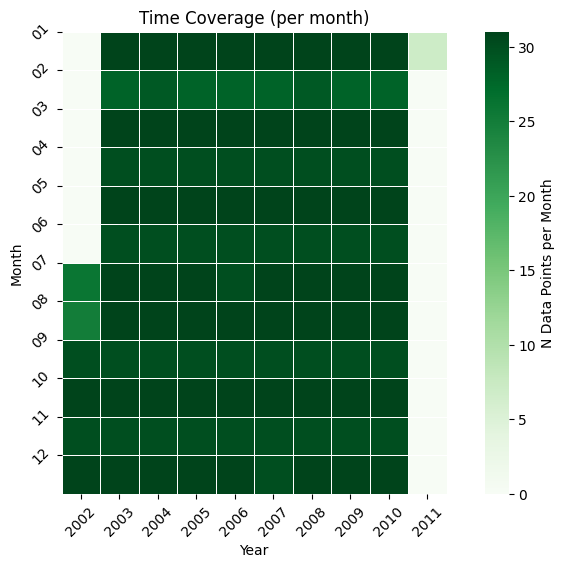

In [21]:
plot_time_coverage(ds)

## Timeseries at a point

In [ ]:
%%time
time_series_df = create_timeseries(ds, 'chl_gsm', lat=-40, lon=130, start_time='2002-08-01', end_time='2002-12-31', lon_name="longitude", lat_name="latitude")

## Plot a gridded variable

Nearest date in dataset: <xarray.DataArray 'time' ()> Size: 8B
array('2011-01-01T05:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2011-01-01T05:30:00
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time
Variable Long Name: Chlorophyll Concentration, GSM model
No valid data for 2011-01-01, skipping this date.
No valid data for 2011-01-02, skipping this date.
No valid data for 2011-01-03, skipping this date.
No valid data for 2011-01-04, skipping this date.
No valid data for 2011-01-05, skipping this date.
No valid data for 2011-01-06, skipping this date.
No valid data for 2011-01-07, skipping this date.


ValueError: No valid data found in the selected range of dates and coordinates.

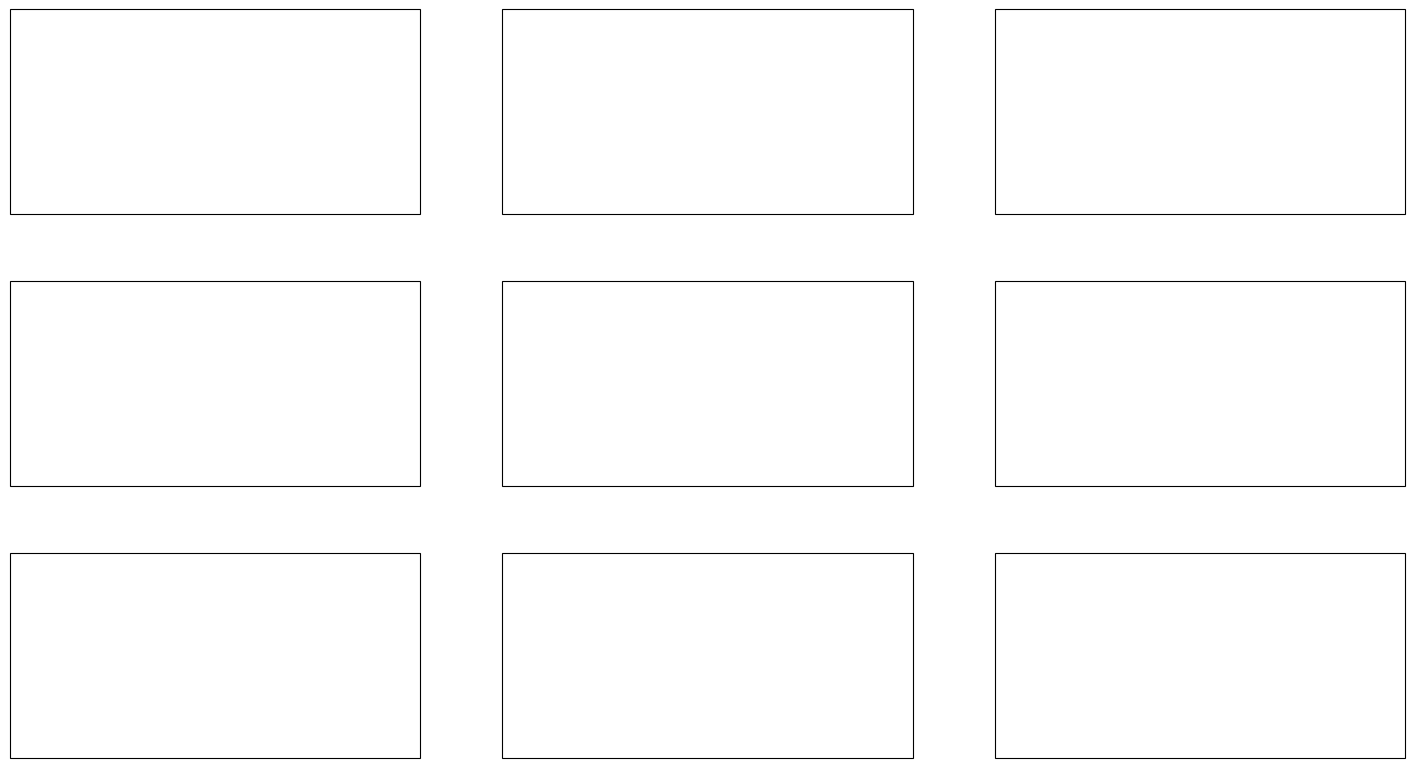

In [19]:
plot_gridded_variable(ds, start_date='2011-01-01', lon_slice=(140, 150), lat_slice=(-50, -30), var_name='chl_gsm', n_days=9, coastline_resolution="110m", lon_name="longitude", lat_name="latitude", log_scale=True)